In [2]:
import pickle
import shap
from matplotlib import pyplot as plt
# Visualising local predictions
shap.initjs()

In [4]:
%load_ext autoreload
%autoreload 2
# Bring utils package onto the path
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from utils import DataLoader, RunModel

## MCI/NC Classification

### Load MCI/NC model

In [5]:
rf, X_train, X_test, y_train, y_test = pickle.load(open('models/best_model', 'rb'))

In [6]:
explainer = shap.TreeExplainer(rf.model)

# shap_values[1] is the SHAP values for the positive class (Patient with AD) & shap_values[0] is SHAP values for the negative class (No AD)
shap_values = explainer.shap_values(X_test)
test_range = X_test[1:400]
shap_values = explainer.shap_values(test_range)

### Global Interpretation

Visualising global feature contributions...


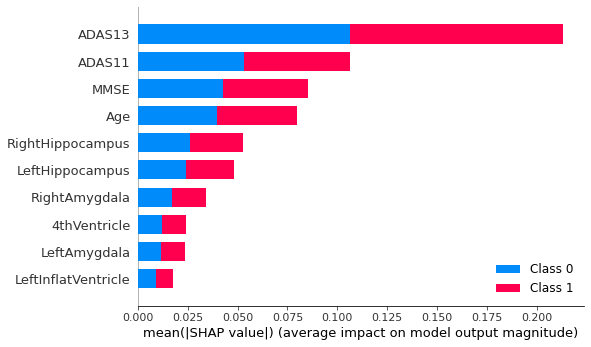

In [7]:
# Overall plot of importance for each feature
print("Visualising global feature contributions...")
shap.summary_plot(shap_values, X_test, max_display = 10, show=False)
# plt.savefig('plots/MCI_GlobalFeatureContr.png', bbox_inches="tight")

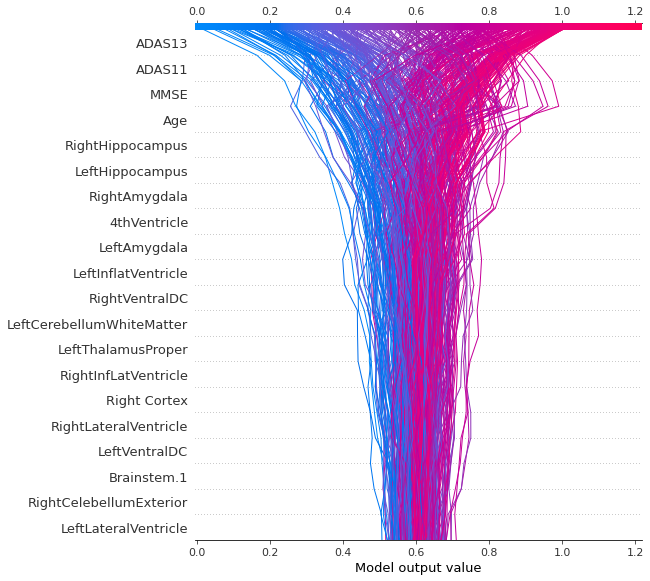

In [8]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], test_range)

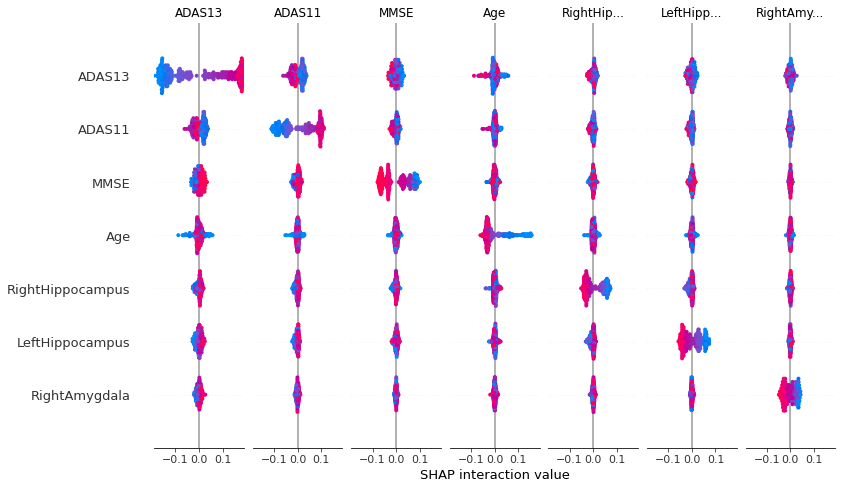

In [12]:
shap_interaction_values = explainer.shap_interaction_values(test_range)
shap.summary_plot(shap_interaction_values[1], test_range)

#### Dependence plots

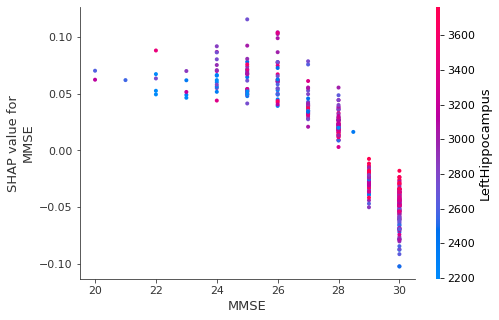

In [9]:
shap.dependence_plot(2, shap_values[1], test_range, show=False)
# plt.savefig('plots/MCI_MMSE_FeatureDep.png', bbox_inches="tight")

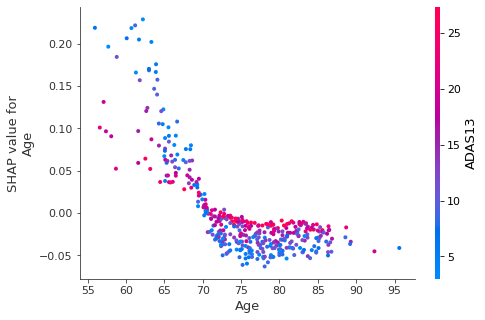

In [10]:
shap.dependence_plot(1, shap_values[1], test_range, show=False)
# plt.savefig('plots/MCI_Age_FeatureDep.png', bbox_inches="tight")

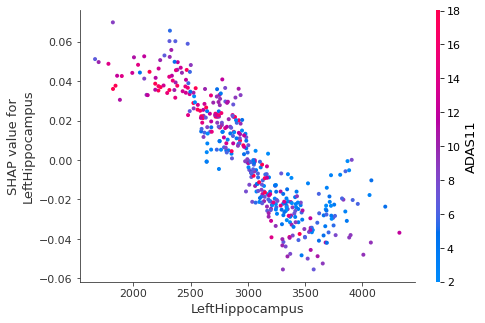

In [11]:
shap.dependence_plot(22, shap_values[1], test_range, show=False)
# plt.savefig('plots/MCI_LHipp_FeatureDep.png', bbox_inches="tight")

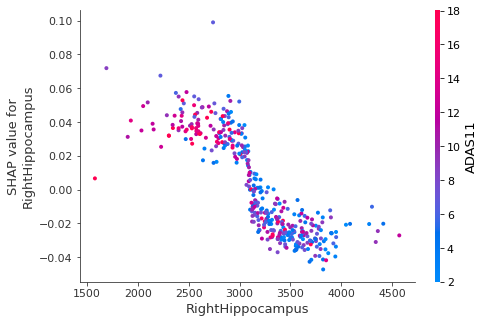

In [12]:
shap.dependence_plot(21, shap_values[1], test_range)
# plt.savefig('plots/MCI_RHipp_FeatureDep.png', bbox_inches="tight")

### Local Interpretation

In [15]:
def test_patient_fp(tp):
    test_patient = X_test[tp:tp+1]
    shap_values = explainer.shap_values(test_patient)

    prediction = rf.model.predict(test_patient)[0]
    if prediction == 0:
        classification = "NC"
    else:
        classification = "MCI"
    print(f"Random forest model predicted: {prediction} ({classification})")
    #shap.force_plot(explainer.expected_value[1], shap_values[1], test_patient)
    shap_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], test_patient)
    return shap_plot

In [16]:
test_patient_fp(1)

Random forest model predicted: 1 (MCI)


In [17]:
test_patient_fp(28)

Random forest model predicted: 0 (NC)


In [18]:
test_patient_fp(15)

Random forest model predicted: 0 (NC)
